In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('churn_prediction.csv', delimiter=',')
df.shape

(28382, 21)

In [48]:
df.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [49]:
df.isna().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [8]:
df[10:25]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
10,12,661,68,Male,0.0,retired,409.0,3,709,5.0,1928.76,1571.47,1722.60,747.66,443.40,0.54,0.54,208.79,1606.54,1800.15,0
11,13,7108,32,Male,0.0,salaried,1096.0,1,89,20.0,6886.40,8372.64,9149.45,21007.52,7564.53,4550.24,9907.91,5161.96,8532.97,8072.33,0
12,14,2438,73,Male,0.0,retired,44.0,3,409,47.0,554.38,5728.66,1794.39,137.25,0.33,500.33,5098.90,508.53,2541.22,2612.60,1
13,15,5703,50,Male,0.0,salaried,409.0,1,88,303.0,4548.48,3526.01,2831.89,8075.81,0.61,0.61,1748.08,2529.75,2985.16,1536.98,0
14,16,2314,48,Female,0.0,self_employed,665.0,2,569,52.0,5431.42,5489.14,6532.99,7720.34,0.66,661.73,0.66,2811.53,5437.04,6633.94,1
15,17,1934,51,Female,0.0,self_employed,1232.0,3,149,-1.0,2010.98,1994.84,1829.43,2415.57,0.16,0.16,128.66,360.70,1960.91,1840.23,0
16,19,2723,49,Male,0.0,self_employed,1125.0,3,1023,0.0,1448.49,3183.27,3021.27,1710.93,190.71,113.64,2461.66,1257.41,1950.95,3127.00,1
17,20,6111,52,Female,0.0,self_employed,1096.0,2,32,3.0,5292.13,3804.06,3946.99,3931.91,3916.91,0.27,0.27,16.70,4158.66,3810.95,0
18,21,5821,47,Female,1.0,self_employed,146.0,1,490,69.0,3507.71,3965.26,4356.62,3623.20,0.56,0.56,71.99,8600.56,3605.40,4022.04,0
19,22,3500,41,Female,0.0,self_employed,1020.0,2,542,31.0,3042.70,3118.34,2843.98,2606.86,0.30,1986.01,104.44,1000.30,3101.18,2692.52,1


In [7]:
df['gender'].fillna('No Gender', inplace = True)
df['dependents'].fillna(0.0, inplace = True)
df['occupation'].fillna('no occupation', inplace = True)
df['city'].fillna(0.0, inplace = True)
df['days_since_last_transaction'].fillna(-1, inplace = True)

In [9]:
df = df.drop(['customer_id'], axis = 1)

In [10]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.0,self_employed,0.0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0.0,salaried,146.0,2,41,-1.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,No Gender,0.0,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [12]:
df.dtypes

vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

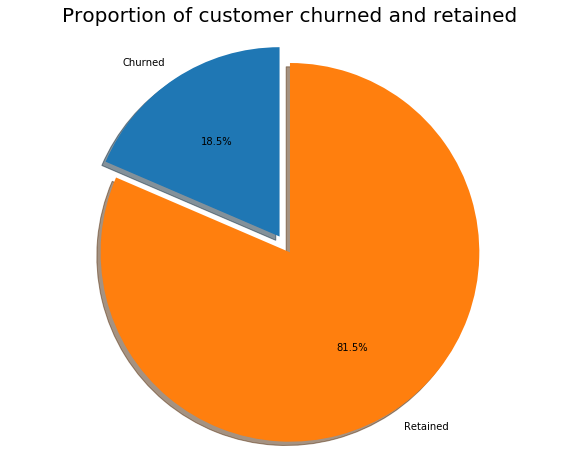

In [14]:
labels = 'Churned', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

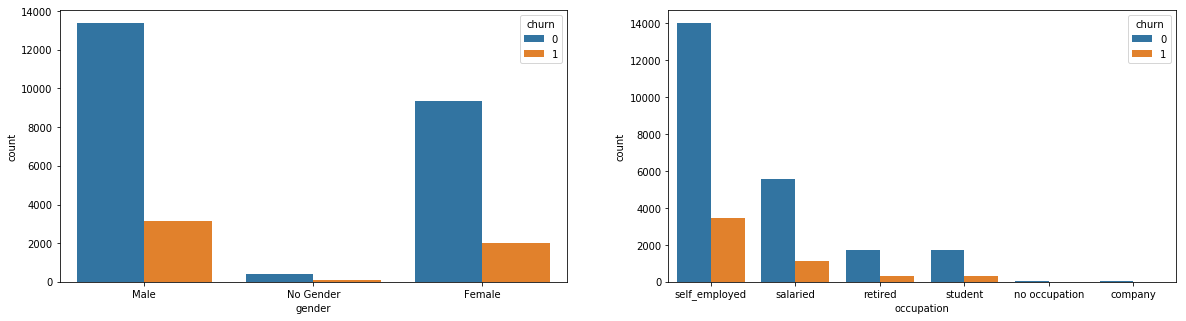

In [24]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0])
sns.countplot(x='occupation', hue = 'churn',data = df, ax=axarr[1])

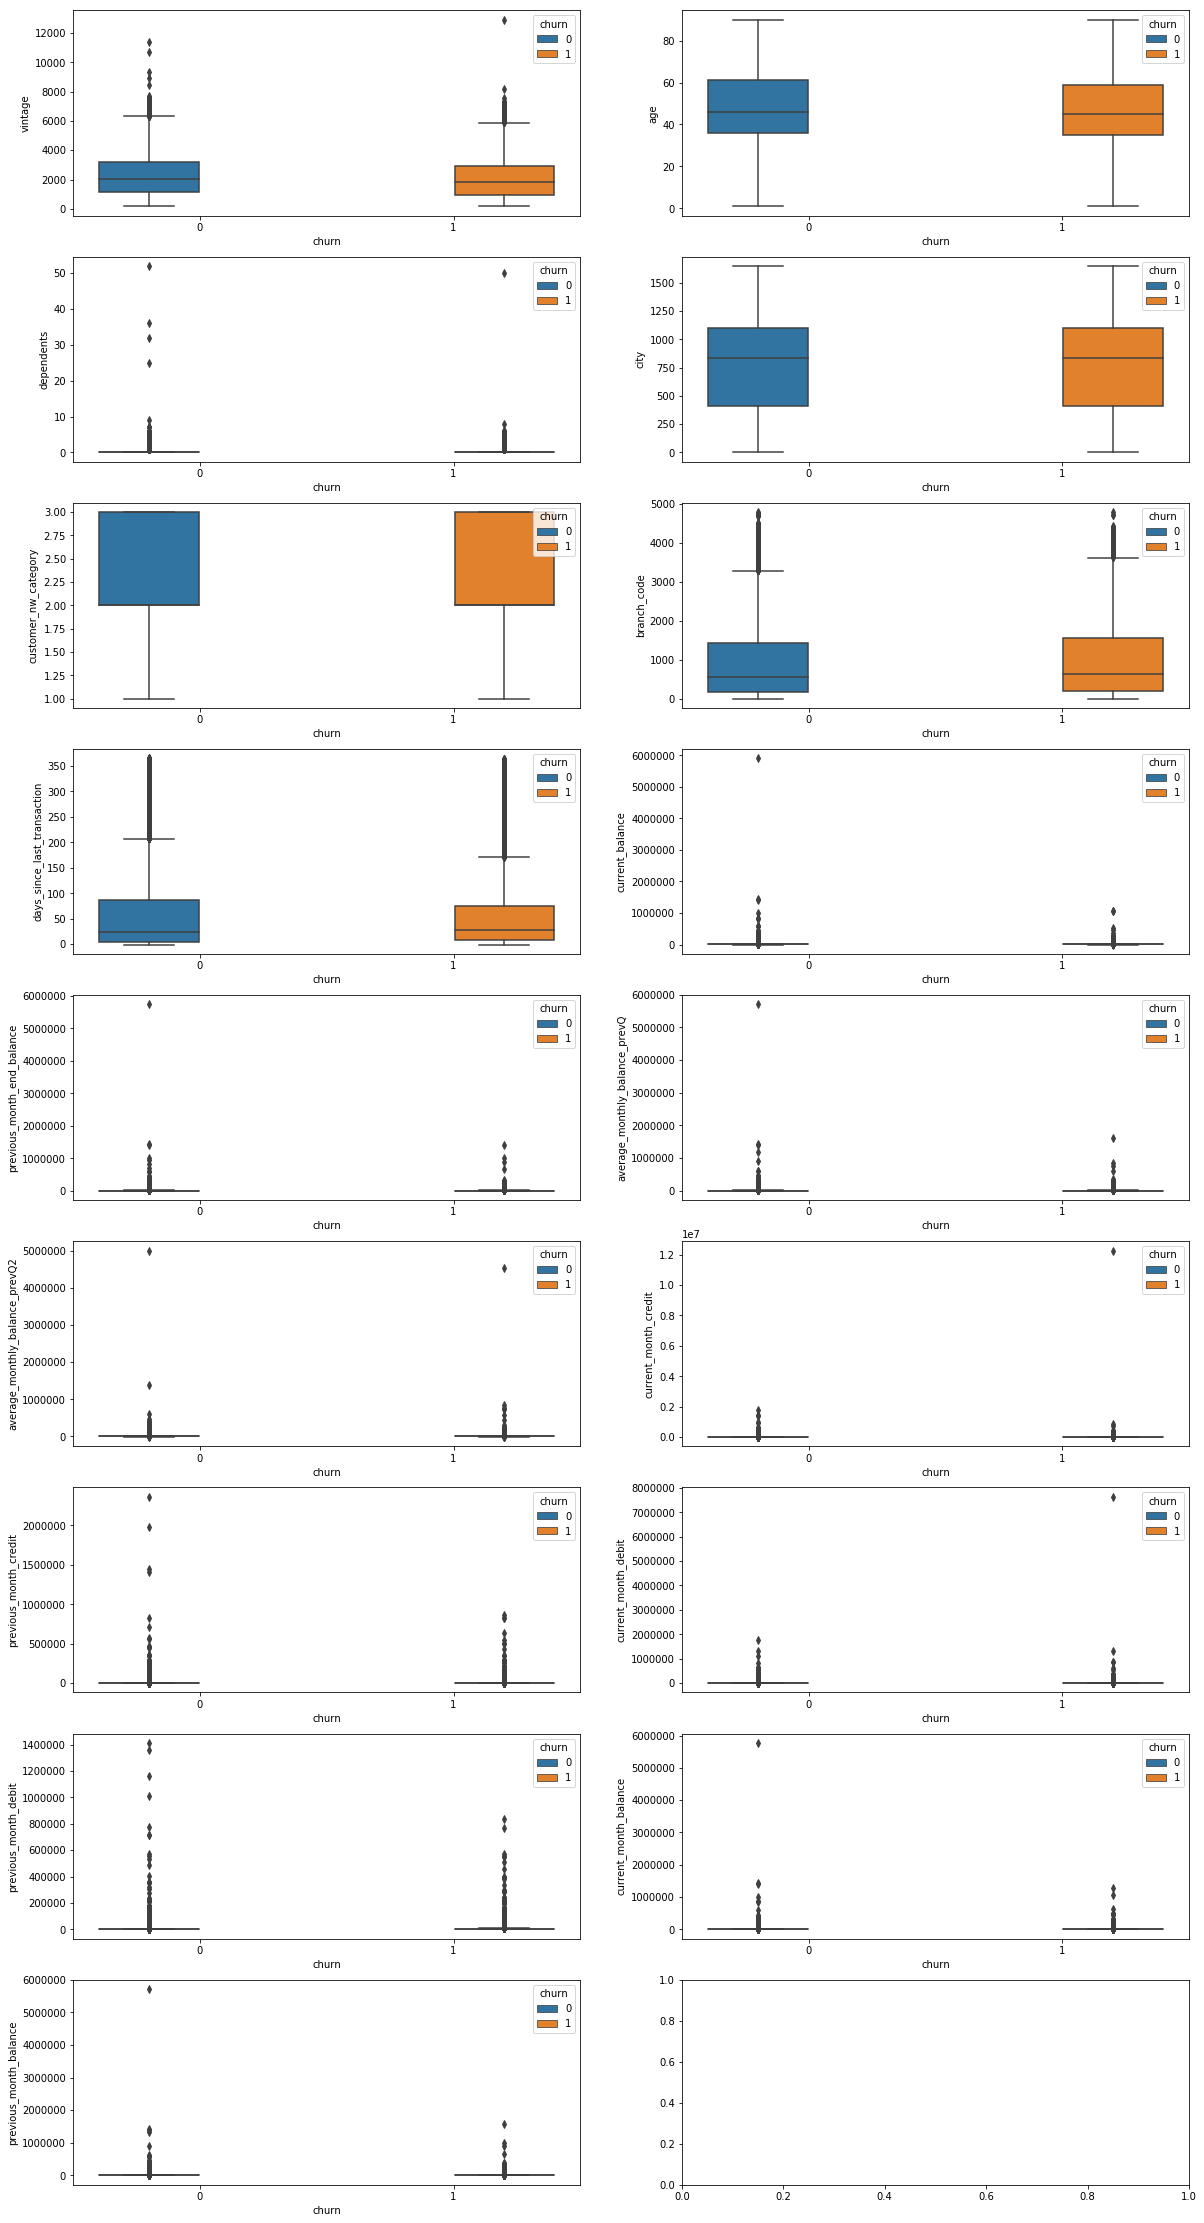

In [27]:
fig, axarr = plt.subplots(9, 2, figsize=(20, 40))
sns.boxplot(y='vintage',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df, ax=axarr[0][1])
sns.boxplot(y='dependents',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='city',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='customer_nw_category',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='branch_code',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])
sns.boxplot(y='days_since_last_transaction',x = 'churn', hue = 'churn',data = df, ax=axarr[3][0])
sns.boxplot(y='current_balance',x = 'churn', hue = 'churn',data = df, ax=axarr[3][1])
sns.boxplot(y='previous_month_end_balance',x = 'churn', hue = 'churn',data = df, ax=axarr[4][0])
sns.boxplot(y='average_monthly_balance_prevQ',x = 'churn', hue = 'churn',data = df, ax=axarr[4][1])
sns.boxplot(y='average_monthly_balance_prevQ2',x = 'churn', hue = 'churn',data = df, ax=axarr[5][0])
sns.boxplot(y='current_month_credit',x = 'churn', hue = 'churn',data = df, ax=axarr[5][1])
sns.boxplot(y='previous_month_credit',x = 'churn', hue = 'churn',data = df, ax=axarr[6][0])
sns.boxplot(y='current_month_debit',x = 'churn', hue = 'churn',data = df, ax=axarr[6][1])
sns.boxplot(y='previous_month_debit',x = 'churn', hue = 'churn',data = df, ax=axarr[7][0])
sns.boxplot(y='current_month_balance',x = 'churn', hue = 'churn',data = df, ax=axarr[7][1])
sns.boxplot(y='previous_month_balance',x = 'churn', hue = 'churn',data = df, ax=axarr[8][0])

In [28]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

22706
5676


(-1, 5)

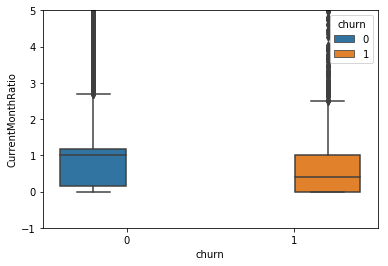

In [29]:
df_train['CurrentMonthRatio'] = df_train.current_month_credit/df_train.current_month_debit
sns.boxplot(y='CurrentMonthRatio',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 5)

(-1, 5)

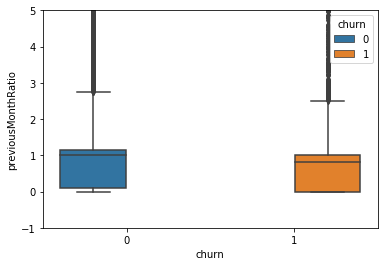

In [31]:
df_train['previousMonthRatio'] = df_train.previous_month_credit/df_train.previous_month_debit
sns.boxplot(y='previousMonthRatio',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 5)

(-1, 5)

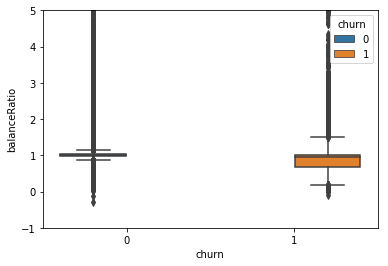

In [33]:
df_train['balanceRatio'] = df_train.current_month_balance/df_train.previous_month_end_balance
sns.boxplot(y='balanceRatio',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 5)

(-1, 5)

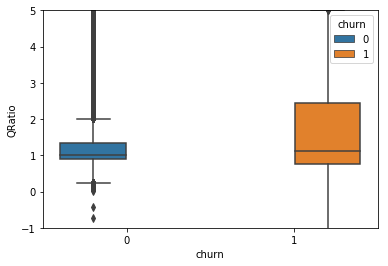

In [36]:
df_train['QRatio'] = df_train.average_monthly_balance_prevQ/df_train.average_monthly_balance_prevQ2
sns.boxplot(y='QRatio',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 5)

(-1, 5)

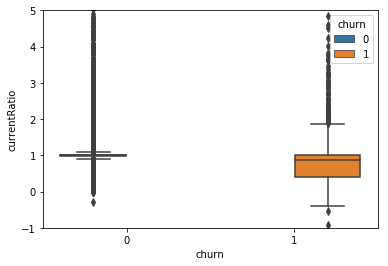

In [37]:
df_train['currentRatio'] = df_train.current_balance/df_train.current_month_balance
sns.boxplot(y='currentRatio',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 5)

In [38]:
df_train.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,CurrentMonthRatio,previousMonthRatio,balanceRatio,QRatio,currentRatio
11549,1620,65,Female,0.0,self_employed,1020.0,3,1201,-1.0,2332.30,2330.48,2345.19,2381.79,0.39,0.39,0.39,0.39,2332.17,2330.48,0,1.000000,1.00000,1.000725,0.984633,1.000056
26063,302,30,Male,0.0,self_employed,575.0,3,3565,144.0,58542.08,58539.85,58538.62,50149.96,0.46,0.46,0.46,0.46,58541.00,58538.42,0,1.000000,1.00000,1.000020,1.167272,1.000018
24284,1364,5,Male,0.0,student,1084.0,2,2860,-1.0,2556.63,2556.63,2556.63,2485.11,0.70,0.70,0.70,0.70,2556.63,2556.63,0,1.000000,1.00000,1.000000,1.028779,1.000000
27803,1985,59,Female,0.0,self_employed,575.0,3,616,240.0,1487.20,1487.20,1487.20,1477.78,0.47,0.47,0.47,0.47,1487.20,1487.20,0,1.000000,1.00000,1.000000,1.006374,1.000000
27477,5351,41,Female,0.0,salaried,1020.0,1,143,12.0,15648.69,5753.03,7802.82,12348.91,22888.91,17173.29,10033.74,11104.47,10726.09,6094.59,1,2.281194,1.54652,1.864424,0.631863,1.458937


In [40]:
cat_vars = ['gender', 'occupation']
con_vars = ['vintage', 'age', 'dependents', 'city', 'customer_nw_category', 'branch_code', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance', 'CurrentMonthRatio', 'previousMonthRatio', 'balanceRatio', 'QRatio', 'currentRatio']
df_train = df_train[['churn'] + cat_vars + con_vars]
df_train.head()

,churn,gender,occupation,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,CurrentMonthRatio,previousMonthRatio,balanceRatio,QRatio,currentRatio
11549,0,Female,self_employed,1620,65,0.0,1020.0,3,1201,-1.0,2332.30,2330.48,2345.19,2381.79,0.39,0.39,0.39,0.39,2332.17,2330.48,1.000000,1.00000,1.000725,0.984633,1.000056
26063,0,Male,self_employed,302,30,0.0,575.0,3,3565,144.0,58542.08,58539.85,58538.62,50149.96,0.46,0.46,0.46,0.46,58541.00,58538.42,1.000000,1.00000,1.000020,1.167272,1.000018
24284,0,Male,student,1364,5,0.0,1084.0,2,2860,-1.0,2556.63,2556.63,2556.63,2485.11,0.70,0.70,0.70,0.70,2556.63,2556.63,1.000000,1.00000,1.000000,1.028779,1.000000
27803,0,Female,self_employed,1985,59,0.0,575.0,3,616,240.0,1487.20,1487.20,1487.20,1477.78,0.47,0.47,0.47,0.47,1487.20,1487.20,1.000000,1.00000,1.000000,1.006374,1.000000
27477,1,Female,salaried,5351,41,0.0,1020.0,1,143,12.0,15648.69,5753.03,7802.82,12348.91,22888.91,17173.29,10033.74,11104.47,10726.09,6094.59,2.281194,1.54652,1.864424,0.631863,1.458937


In [41]:
lst = ['gender', 'occupation']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

C:\Users\araik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,churn,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,CurrentMonthRatio,previousMonthRatio,balanceRatio,QRatio,currentRatio,gender_Female,gender_Male,gender_No Gender,occupation_self_employed,occupation_student,occupation_salaried,occupation_retired,occupation_company,occupation_no occupation
11549,0,1620,65,0.0,1020.0,3,1201,-1.0,2332.30,2330.48,2345.19,2381.79,0.39,0.39,0.39,0.39,2332.17,2330.48,1.000000,1.00000,1.000725,0.984633,1.000056,1,-1,-1,1,-1,-1,-1,-1,-1
26063,0,302,30,0.0,575.0,3,3565,144.0,58542.08,58539.85,58538.62,50149.96,0.46,0.46,0.46,0.46,58541.00,58538.42,1.000000,1.00000,1.000020,1.167272,1.000018,-1,1,-1,1,-1,-1,-1,-1,-1
24284,0,1364,5,0.0,1084.0,2,2860,-1.0,2556.63,2556.63,2556.63,2485.11,0.70,0.70,0.70,0.70,2556.63,2556.63,1.000000,1.00000,1.000000,1.028779,1.000000,-1,1,-1,-1,1,-1,-1,-1,-1
27803,0,1985,59,0.0,575.0,3,616,240.0,1487.20,1487.20,1487.20,1477.78,0.47,0.47,0.47,0.47,1487.20,1487.20,1.000000,1.00000,1.000000,1.006374,1.000000,1,-1,-1,1,-1,-1,-1,-1,-1
27477,1,5351,41,0.0,1020.0,1,143,12.0,15648.69,5753.03,7802.82,12348.91,22888.91,17173.29,10033.74,11104.47,10726.09,6094.59,2.281194,1.54652,1.864424,0.631863,1.458937,1,-1,-1,-1,-1,1,-1,-1,-1


In [42]:
minVec = df_train[con_vars].min().copy()
maxVec = df_train[con_vars].max().copy()
df_train[con_vars] = (df_train[con_vars]-minVec)/(maxVec-minVec)
df_train.head()

,churn,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,CurrentMonthRatio,previousMonthRatio,balanceRatio,QRatio,currentRatio,gender_Female,gender_Male,gender_No Gender,occupation_self_employed,occupation_student,occupation_salaried,occupation_retired,occupation_company,occupation_no occupation
11549,0,0.113216,0.719101,0.0,0.618557,1.0,0.250994,0.000000,0.001326,0.000954,0.000161,0.002604,3.097024e-08,1.608937e-07,4.975217e-08,2.687092e-07,0.000987,0.001310,7.953779e-08,1.584432e-07,0.000603,0.000081,0.074955,1,-1,-1,1,-1,-1,-1,-1,-1
26063,0,0.009592,0.325843,0.0,0.348696,1.0,0.745451,0.396175,0.010834,0.010741,0.010021,0.012118,3.667528e-08,1.905320e-07,5.891705e-08,3.182083e-07,0.010709,0.011128,7.953779e-08,1.584432e-07,0.000603,0.000083,0.074954,-1,1,-1,1,-1,-1,-1,-1,-1
24284,0,0.093089,0.044944,0.0,0.657368,0.5,0.597992,0.000000,0.001364,0.000993,0.000198,0.002624,5.623543e-08,2.921490e-07,9.033947e-08,4.879194e-07,0.001026,0.001350,7.953779e-08,1.584432e-07,0.000603,0.000082,0.074954,-1,1,-1,-1,1,-1,-1,-1,-1
27803,0,0.141914,0.651685,0.0,0.348696,1.0,0.128634,0.658470,0.001183,0.000807,0.000010,0.002424,3.749028e-08,1.947660e-07,6.022631e-08,3.252796e-07,0.000841,0.001163,7.953779e-08,1.584432e-07,0.000603,0.000081,0.074954,1,-1,-1,1,-1,-1,-1,-1,-1
27477,1,0.406557,0.449438,0.0,0.618557,0.0,0.029701,0.035519,0.003578,0.001550,0.001118,0.004589,1.865460e-03,7.271242e-03,1.313684e-03,7.852292e-03,0.002439,0.001968,1.814412e-07,2.450356e-07,0.000615,0.000077,0.076090,1,-1,-1,-1,-1,1,-1,-1,-1


In [43]:
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    df_predict['CurrentMonthRatio'] = df_train.current_month_credit/df_train.current_month_debit
    df_predict['previousMonthRatio'] = df_train.previous_month_credit/df_train.previous_month_debit
    df_predict['balanceRatio'] = df_train.current_month_balance/df_train.previous_month_end_balance
    df_predict['QRatio'] = df_train.average_monthly_balance_prevQ/df_train.average_monthly_balance_prevQ2
    df_predict['currentRatio'] = df_train.current_balance/df_train.current_month_balance
    
    cat_vars = ['gender', 'occupation']
    con_vars = ['vintage', 'age', 'dependents', 'city', 'customer_nw_category', 'branch_code', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance', 'CurrentMonthRatio', 'previousMonthRatio', 'balanceRatio', 'QRatio', 'currentRatio']
    df_predict = df_predict[['churn'] + cat_vars + con_vars]
    
    lst = ['gender', 'occupation']
    remove = list()
    for i in lst:
        if (df_predict[i].dtype == np.str or df_predict[i].dtype == np.object):
            for j in df_predict[i].unique():
                df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
            remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
   
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    
    df_predict = df_predict[df_train_Cols]
    return df_predict
    
    

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)

C:\Users\araik\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
from sklearn.metrics import classification_report

RF.n_jobs = 1
print(classification_report(df_train.churn,  RF.predict(df_train.loc[:, df_train.columns != 'churn'])))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93     18484
          1       0.84      0.48      0.61      4222

avg / total       0.88      0.89      0.87     22706

